In [2]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np


In [125]:
df = dd.read_csv('/home/oldboy/Downloads/test_24h/20230511_170231-ROI_6-qua/data.csv', sep=';', skiprows=1, 
                 assume_missing=True)  



In [126]:
def euclid(df):
    return np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + 
                   (df['centroid_y'] - df['centroid_y'].shift(1))**2
                  )

df['distance'] = df.map_partitions(euclid)


In [127]:

#df['mot_dist'] = np.sqrt((df['centroid_x'] - df['centroid_x'].shift(1))**2 + (df['centroid_y'] - df['centroid_y'].shift(1))**2)
#df['mot_dist'] = df['mot_dist'].fillna(0)

avg_min = df.groupby(['ID']).mean()
avg_min = df.groupby(['minute']).mean()

avg_min = avg_min.compute()
avg_min
#avg_min

,ID,timeStamp,hour,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,distance
minute,,,,,,,,,,,
0.0,181697.5,49242.164286,0.0,21.562868,0.0,25.693611,25.693611,28.057993,60.201822,27.544629,0.052378
1.0,182203.5,49302.174222,0.0,21.552598,0.0,25.896433,25.896433,28.061564,60.092376,27.741411,0.172276
2.0,182711.0,49362.244462,0.0,21.510883,0.0,26.221462,26.221462,28.107259,60.010758,28.162190,0.065985
3.0,183219.0,49422.182574,0.0,21.514716,0.0,26.346036,26.346036,28.127594,59.926750,28.294391,0.036886
4.0,183723.0,49482.084363,0.0,21.528714,0.0,26.278439,26.278439,28.332234,60.143957,28.277241,0.048535
...,...,...,...,...,...,...,...,...,...,...,...
1435.0,179181.5,48942.226786,23.0,21.529205,0.0,25.402849,25.402849,27.747117,60.887837,26.319024,0.027239
1436.0,179687.0,49002.147279,23.0,21.496629,0.0,25.434183,25.434183,27.838181,60.619365,26.271774,0.014878
1437.0,180189.5,49062.067977,23.0,21.491560,0.0,25.487617,25.487617,27.854127,60.710932,27.216306,0.026979


<IPython.core.display.Javascript object>


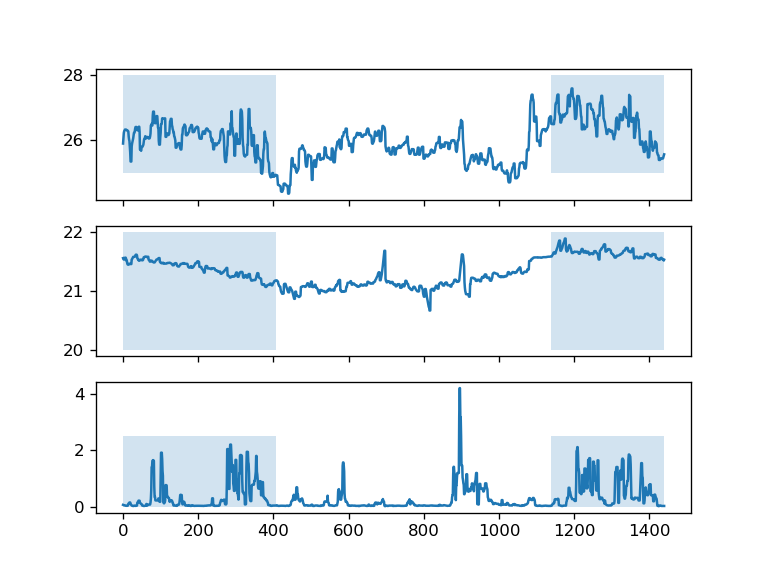

In [128]:

%matplotlib notebook

fig,ax = plt.subplots(3,1,sharex=True)

avg_min[['temp_avg','RT','distance']] = avg_min[['temp_avg','RT','distance']].rolling(5,center=True,min_periods=1).median()
ax[0].plot(avg_min.index,avg_min['temp_avg'])
ax[0].fill_between(avg_min.index,y1=25,y2=28, where=avg_min['isDay']<0.5,alpha=.2)

ax[1].plot(avg_min.index,avg_min['RT'])
ax[1].fill_between(avg_min.index,y1=20,y2=22, where=avg_min['isDay']<0.5,alpha=.2)

ax[2].plot(avg_min.index,avg_min['distance'])
ax[2].fill_between(avg_min.index,y1=0,y2=2.5, where=avg_min['isDay']<0.5,alpha=.2)


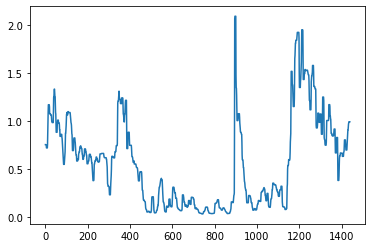

In [90]:

plt.plot(avg_min.index,avg_min['distance'])





In [29]:
a = df.head()
a

,ID,Date,timeStamp,hour,minute,RT,isDay,temp_avg,temp_med,temp_max,centroid_x,centroid_y,mot_dist
0,1.0,2023-05-11 18:00:00,27610.547513,18.0,1080.0,21.518791,1.0,26.557704,26.557704,28.581446,40.642601,37.073159,0.000000
1,2.0,2023-05-11 18:00:00,27610.771466,18.0,1080.0,21.519199,1.0,26.571749,26.571749,28.608881,40.631302,37.097113,0.026485
2,3.0,2023-05-11 18:00:00,27610.902399,18.0,1080.0,21.513154,1.0,26.566259,26.566259,28.595444,40.655628,37.090686,0.025161
3,4.0,2023-05-11 18:00:00,27611.034012,18.0,1080.0,21.516176,1.0,26.560682,26.560682,28.591405,40.631080,37.098128,0.025651
4,5.0,2023-05-11 18:00:00,27611.152734,18.0,1080.0,21.512663,1.0,26.559301,26.559301,28.576416,40.630618,37.096871,0.001339
